In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv("youtube.csv")

In [3]:
data = data[data['Avarage View Duration'].notna()]


In [4]:
data['Seconds'] = data['Avarage View Duration'].str[-2:].astype(int)

In [5]:
data[['Avarage View Duration', 'Seconds']].head()


,Avarage View Duration,Seconds
0,0:00:42,42
1,0:00:42,42
2,0:00:45,45
3,0:00:48,48
4,0:00:38,38


In [6]:
data=data.drop(["Avarage View Duration"], axis=1)

In [7]:
data = data.rename(columns={"Theme of vid": "ThemeOfVid"})

In [8]:
data = data.rename(columns={"Impressions click-through rate": "click-through rate"})

In [9]:
data

,Name,ThemeOfVid,Publish Date,Duration,Stayed To Watch,Views,Impressions,click-through rate,Seconds
0,Total:,NaN,NaN,NaN,80.57,66483338,31003967,5.42,42
1,Why Did Terminator Cut Skin Off His Hand?,film fact,29-Dec-24,45.0,85.67,15832381,5619116,6.34,42
2,Jason Statham Scared them RIch People,actor fact,9-Feb-25,48.0,80.81,6352148,74152,3.84,45
3,How Predator Decides The Way To Finish Its Vic...,character fact,8-Feb-25,51.0,78.45,5924552,227239,4.58,48
4,Did You Notice This In Resident Evil Movie?,film fact,18-Jan-25,39.0,80.76,4178796,63544,2.32,38
...,...,...,...,...,...,...,...,...,...
88,Who Is The Richest Fictional Character?,character fact,27-Nov-24,54.0,73.67,4981,7144,2.93,45
89,Voice Actors That Are Everywhere Part 1,voiceactor fact,12-Aug-24,47.0,70.46,3294,9020,13.17,35
90,Voice Actors That Are Everywhere Part 2,voiceactor fact,13-Aug-24,52.0,67.45,2510,8436,8.26,37
91,How Quentin Tricked Salma Hayek #movie #facts,actor fact,12-Feb-25,51.0,68.96,2074,10251,2.30,39


In [10]:
data=data.drop(['Publish Date'], axis=1)


In [11]:
data.dropna(inplace=True)


In [12]:
data

,Name,ThemeOfVid,Duration,Stayed To Watch,Views,Impressions,click-through rate,Seconds
1,Why Did Terminator Cut Skin Off His Hand?,film fact,45.0,85.67,15832381,5619116,6.34,42
2,Jason Statham Scared them RIch People,actor fact,48.0,80.81,6352148,74152,3.84,45
3,How Predator Decides The Way To Finish Its Vic...,character fact,51.0,78.45,5924552,227239,4.58,48
4,Did You Notice This In Resident Evil Movie?,film fact,39.0,80.76,4178796,63544,2.32,38
5,Logical Inconsistency In Terminator :3,film fact,41.0,74.67,3290444,472141,6.55,40
...,...,...,...,...,...,...,...,...
88,Who Is The Richest Fictional Character?,character fact,54.0,73.67,4981,7144,2.93,45
89,Voice Actors That Are Everywhere Part 1,voiceactor fact,47.0,70.46,3294,9020,13.17,35
90,Voice Actors That Are Everywhere Part 2,voiceactor fact,52.0,67.45,2510,8436,8.26,37
91,How Quentin Tricked Salma Hayek #movie #facts,actor fact,51.0,68.96,2074,10251,2.30,39


In [13]:
df=data.join(pd.get_dummies(data['ThemeOfVid'], dtype=int))

In [14]:
df

,Name,ThemeOfVid,Duration,Stayed To Watch,Views,Impressions,click-through rate,Seconds,actor fact,cartoon fact,character fact,character fact,film fact,tech fact,voiceactor fact
1,Why Did Terminator Cut Skin Off His Hand?,film fact,45.0,85.67,15832381,5619116,6.34,42,0,0,0,0,1,0,0
2,Jason Statham Scared them RIch People,actor fact,48.0,80.81,6352148,74152,3.84,45,1,0,0,0,0,0,0
3,How Predator Decides The Way To Finish Its Vic...,character fact,51.0,78.45,5924552,227239,4.58,48,0,0,1,0,0,0,0
4,Did You Notice This In Resident Evil Movie?,film fact,39.0,80.76,4178796,63544,2.32,38,0,0,0,0,1,0,0
5,Logical Inconsistency In Terminator :3,film fact,41.0,74.67,3290444,472141,6.55,40,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Who Is The Richest Fictional Character?,character fact,54.0,73.67,4981,7144,2.93,45,0,0,1,0,0,0,0
89,Voice Actors That Are Everywhere Part 1,voiceactor fact,47.0,70.46,3294,9020,13.17,35,0,0,0,0,0,0,1
90,Voice Actors That Are Everywhere Part 2,voiceactor fact,52.0,67.45,2510,8436,8.26,37,0,0,0,0,0,0,1
91,How Quentin Tricked Salma Hayek #movie #facts,actor fact,51.0,68.96,2074,10251,2.30,39,1,0,0,0,0,0,0


In [15]:
df=df.drop(['ThemeOfVid'], axis=1)

<Axes: >

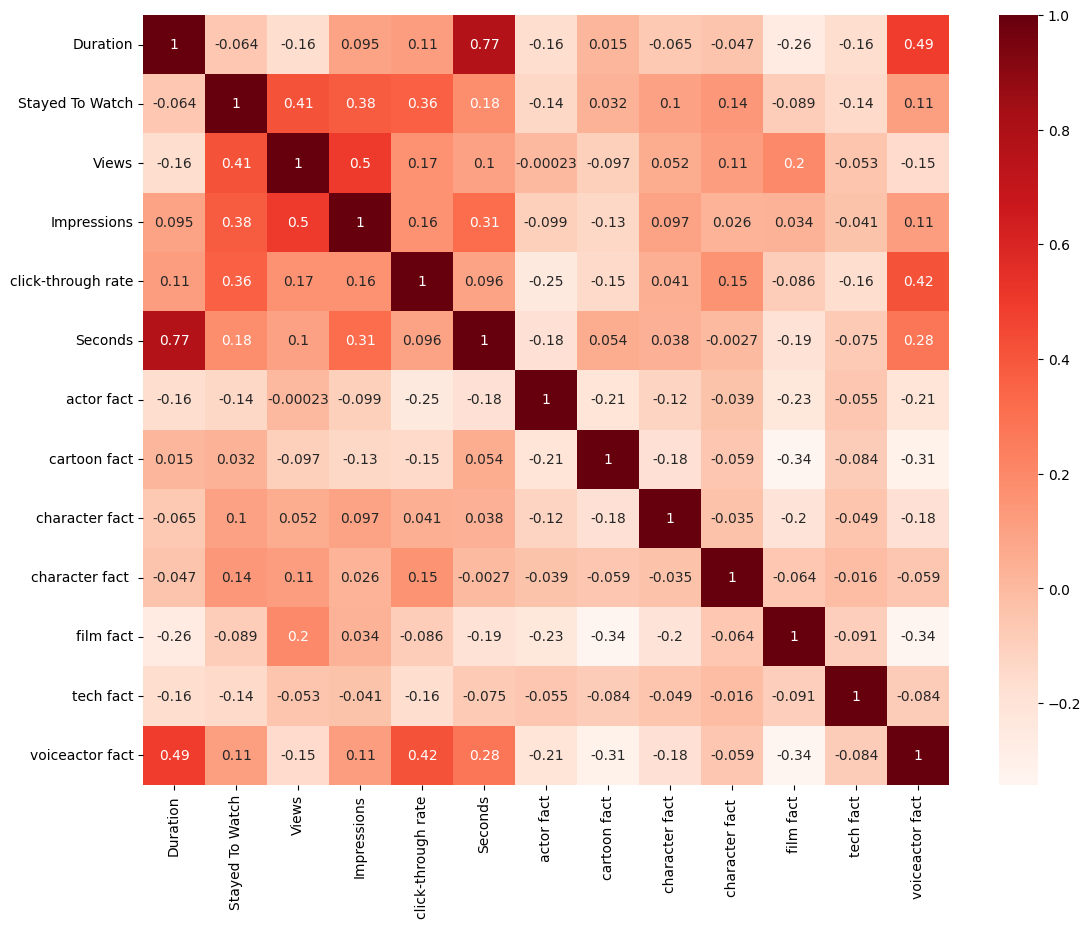

In [16]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Reds")

In [17]:
from scipy.stats import zscore

In [18]:
skewed_cols = ['Views', 'Impressions', 'Seconds']
z_scores = np.abs(df[skewed_cols].apply(zscore))

In [19]:
df = df[(z_scores < 3).all(axis=1)].reset_index(drop=True)

In [20]:
df['avg_ctr_per_duration'] = df['click-through rate'] / (df['Duration'] + 1)
df['impressions_ratio'] = df['Impressions'] / df['Impressions'].mean()
df['views_ratio'] = df['Views'] / df['Views'].mean()

In [21]:
df['view_per_impression'] = df['Views'] / (df['Impressions'] + 1)
df['ctr_per_view'] = df['click-through rate'] / (df['Views'] + 1)

In [22]:

df['duration_per_impression'] = df['Duration'] / (df['Impressions'] + 1)
df['view_rate'] = df['Views'] / (df['Impressions'] + 1)
df['stay_rate'] = df['Stayed To Watch'] / (df['Duration'] + 0.1)
df['impression_speed'] = df['Impressions'] / (df['Seconds'] + 1)

In [23]:
for col in ['Views', 'Impressions', 'Seconds']:
    df[f'log_{col}'] = np.log1p(df[col])

df['title_length'] = df['Name'].astype(str).apply(len)
df['title_word_count'] = df['Name'].astype(str).apply(lambda x: len(x.split()))
df['has_question'] = df['Name'].str.contains(r'\?', regex=True).astype(int)
df['has_exclamation'] = df['Name'].str.contains(r'\!', regex=True).astype(int)
df['has_number'] = df['Name'].str.contains(r'\d', regex=True).astype(int)
df['uppercase_ratio'] = df['Name'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / (len(str(x)) + 1))

In [24]:
df = df.drop(columns=['Name'])  # Drop text column

In [25]:
X = df.drop(columns=['click-through rate'])
y = df['click-through rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
df


,Duration,Stayed To Watch,Views,Impressions,click-through rate,Seconds,actor fact,cartoon fact,character fact,character fact,...,impression_speed,log_Views,log_Impressions,log_Seconds,title_length,title_word_count,has_question,has_exclamation,has_number,uppercase_ratio
0,48.0,80.81,6352148,74152,3.84,45,1,0,0,0,...,1612.000000,15.664304,11.213886,3.828641,37,6,0,0,0,0.157895
1,51.0,78.45,5924552,227239,4.58,48,0,0,1,0,...,4637.530612,15.594616,12.333762,3.891820,51,9,1,0,0,0.173077
2,39.0,80.76,4178796,63544,2.32,38,0,0,0,0,...,1629.333333,15.245534,11.059504,3.663562,43,8,1,0,0,0.181818
3,41.0,74.67,3290444,472141,6.55,40,0,0,0,0,...,11515.634146,15.006533,13.065035,3.713572,38,5,0,0,1,0.102564
4,29.0,82.28,2991608,47737,4.23,27,0,0,0,0,...,1704.892857,14.911322,10.773483,3.332205,29,4,0,0,0,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,54.0,73.67,4981,7144,2.93,45,0,0,1,0,...,155.304348,8.513587,8.874168,3.828641,39,6,1,0,0,0.150000
85,47.0,70.46,3294,9020,13.17,35,0,0,0,0,...,250.555556,8.100161,9.107310,3.583519,39,7,0,0,1,0.150000
86,52.0,67.45,2510,8436,8.26,37,0,0,0,0,...,222.000000,7.828436,9.040382,3.637586,39,7,0,0,1,0.150000
87,51.0,68.96,2074,10251,2.30,39,1,0,0,0,...,256.275000,7.637716,9.235228,3.688879,45,7,0,0,0,0.108696


In [27]:
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R2 Score: {r2:.4f}")

MSE: 0.5744, R2 Score: 0.8225


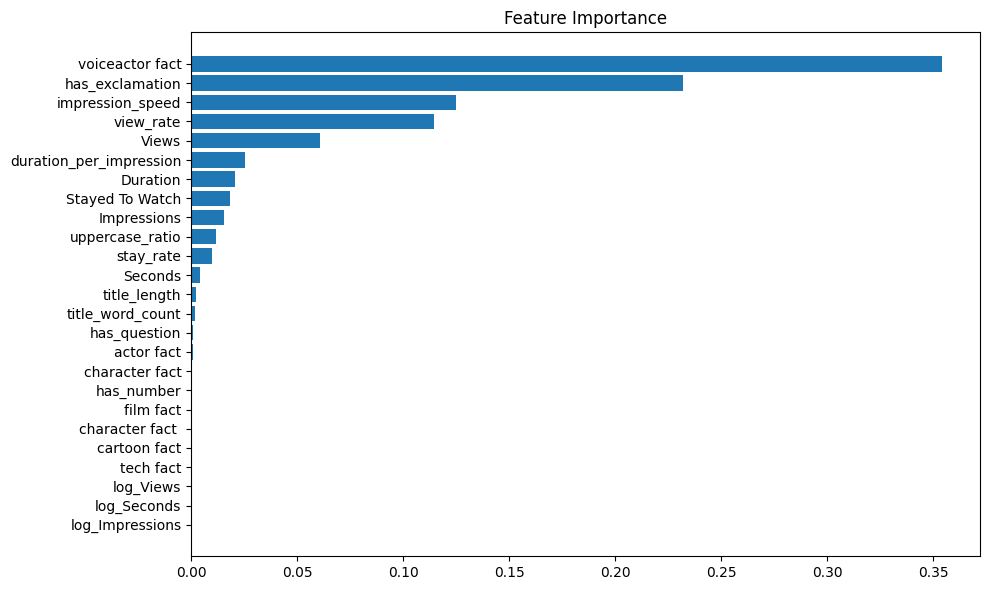

In [26]:

plt.figure(figsize=(10, 6))
importance = model.feature_importances_
sorted_idx = np.argsort(importance)
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(np.arange(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [29]:
import joblib
joblib.dump(model, 'ctr_model.pkl')

print("Model saved to ctr_model.pkl")

Model saved to ctr_model.pkl
